## Bokeh vs Seaborn ?

Bokeh 역시 plotting 을 도와주는 파이썬 패키지 이지만, 훨씬 범용적으로 이용할 수 있는 plotting 툴입니다. 그리고 둘의 특징과 장단점은 명확히 구분됩니다. Seaborn 은 matplotlib 을 이용하여 통계 분석에서 자주 이용되는 몇 가지 plots 을 함수 한 두 번의 호출로 그리는 것을 목적으로, high-level plotting functions 들을 제공합니다. Bokeh 는 통계 분석 외에도 임의의 데이터 시각화를 지원합니다. 지원하는 형식이 다양하기 때문에 high-level plotting functions 보다는 그림을 그리는 과정을 분할한 middle-level functions 과 그 그림의 요소들을 직접 조절할 수 있는 low-level components 들을 지원합니다.

그림의 형식도 다릅니다. Matplotlib 은 정해진 크기의 그림 형식의 plot 을 그리지만, Bokeh 는 JavaScript 를 이용하는, HTML 기반 interactive plots 을 그립니다. JavaScript 를 이용하기 때문에 plots 안에서 간단한 연산도 가능하며, 데이터의 변화에 따라 plots 이 업데이트 되기도 합니다. 이를 이용하여 독립적인 웹서버를 띄울수도 있습니다. 그러나 자유도가 많은 만큼 빠르게 고정된 크기의 scatter plot 정도만 그리기 위함이라면 seaborn 이 더 편할 수도 있습니다.

두 패키지는 만들어진 시기와 목적이 다르니 항상 어떤 패키지가 더 좋다 라고 말하기는 어렵다 생각됩니다. 예를 들어 데이터 전처리에 자주 이용되는 Pandas 는 matplotlib 을 이용하여 빠르게 plots 을 그리는 기능을 제공하는데, seaborn 역시 matplotlib 기반으로 작동하기 때문에 seaborn 의 style 을 pandas 에 손쉽게 적용할 수 있습니다. 물론 Pandas-Bokeh 패키지에서 bokeh 를 이용한 pandas plotting 기능들을 개발하고 있지만, 아직 모든 plots 들을 제공하고 있지는 않습니다. 그러니 상황에 맞게 패키지를 잘 선택하여 사용하면 됩니다.

Bokeh 는 제공하는 기능이 많기 때문에 official tutorial 이 꽤 깁니다. 이 튜토리얼은 데이터 분석을 목적으로 하는 이들이 빠르게 다양한 bokeh 의 기능들을 살펴보기 위하여 만들었습니다. 간단한 기능들은 따로 섹션으로 분리하지 않고 그때그때 설명을 하였습니다.

Bokeh 의 plots 을 구성하는 low-level elements 들은 `bokeh.models` 안에 포함되어 있습니다. 예를 들어 그림의 legend, 그림 위 다각형 등이 있습니다. 그림을 준비하고, 그려진 그림을 저장하거나 보여주는 middle-level 기능들은 `bokeh.plotting` 안에 포함되어 있습니다.

IPython notebook 에서 bokeh 의 그림을 보려면 다음 함수를 실행해야 합니다. 이는 `%matplotlib inline` 처럼 하나의 notebook kernel 에서 한 번만 실행하면 됩니다. 그림의 출력을 notebook 에서 하겠다는 선언입니다.

```python
from bokeh.plotting import output_notebook

output_notebook()
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.models import ColumnDataSource
from bokeh.plotting import output_notebook, figure, show

output_notebook()

Loading BokehJS ...

## ColumnDataSource

Seaborn 은 Pandas.DataFrame 을 데이터로 입력할 수 있도록 지원합니다. Bokeh 도 column, row 형식의 `ColumnDataSource` 데이터를 제공합니다. 만드는 방법은 길이가 같은 sequence 형식의 값을 dict 로 만들거나 혹은 DataFrame 을 그대로 입력하는 방법이 있습니다. 후자는 뒤이어 예시가 있습니다. Seaborn tutorial 과 연속성이 있도록 seaborn 의 'tips' 데이터를 이용합니다.

In [2]:
tips_df = sns.load_dataset("tips")
tips_df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
tips = ColumnDataSource(tips_df)

`Pandas.DataFrame.head()` 함수처럼 데이터를 보여주지는 않습니다. 만약 데이터를 확인할 일이 있다면 아래의 코드를 실행하면 됩니다.

```python
tips.data
```

## scatter plots

Bokeh 의 `bokeh.plotting.figure()` 는 그림을 그릴 캔버스를 준비하는 역할을, `Figure.scatter()` 는 scatter plot 을 그리는 역할을, `bokeh.plotting.show()` 는 그려진 그림을 실제로 출력하는 역할을 합니다.

In [4]:
p = figure(height=400, width=400)
p.scatter(x='total_bill', y='tip', size='tip', source=tips)
show(p)

Bokeh 의 그림은 HTML 코드 형식입니다. 그렇기 때문에 한 번 그려진 그림에서 크기와 같은 attribute 를 수정하여 다시 출력할 수 있습니다. `height` 나 `width` 는 숫자이기 때문에 수정이 쉽지만, 그림의 제목은 'str' 형식이 아닙니다. 이는 그림을 구성하는 요소로 `bokeh.models.Title` 형식입니다. `figure(title='text')` 처럼 제목을 입력해도 되지만, 아래처럼 제목을 추가하여도 됩니다.

In [5]:
from bokeh.models import Title

p.height=300
p.width=300
p.title = Title(text='Figure example')
show(p)

## Map categorical value to color code

Seaborn 의 `hue` 의 기능처럼 데이터의 특정 값에 따라 색을 다르게 표현할 수도 있습니다. Bokeh plotting 에 이용되는 데이터는 x, y, size, alpha, color 모두 동일한 길이의 sequence 형식의 데이터인데 (ColumnDataSource), 우리는 각 record 마다 컬러를 지정하지 않았습니다. 대신 `color` 에 변수 값을 기반으로 식을 바꿔주는, 즉 color sequence 를 만들어 이용하는 기능을 제공합니다. `bokeh.transform.factor_cmap()` 은 데이터의 한 변수를 기준으로 그 값들을 특정 색으로 변환합니다. `alpha` 는 seaborn 과 같이 투명도입니다. 1이면 투명하지 않습니다.

In [6]:
from bokeh.transform import factor_cmap, factor_mark

days = ['Sun', 'Sat', 'Thur', 'Fri']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

p = figure(height=400, width=400)
p.scatter(x='total_bill', y='tip', size='tip', alpha=0.5, source=tips,
    color=factor_cmap('day', colors, days), legend_field='day')
show(p)

연속형 변수를 이용하여 색을 바꿀 경우에는 `bokeh.transform.linear_cmap()` 을 이용할 수 있습니다.

In [7]:
from bokeh.palettes import Reds256
from bokeh.transform import linear_cmap

color_func = linear_cmap(
    field_name = 'tip',
    palette = Reds256,
    low = 0, high = 8,
)

p = figure(height=400, width=400)
p.scatter(x='total_bill', y='tip', size='tip', alpha=0.5, source=tips,
    color=color_func, legend_field='day')
show(p)

## Palettes, lists of color code

`linear_cmap` 의 arguments 인 palette 에 Reds256 이라는 변수를 입력하였습니다. 이 값은 길이가 256 인 list of str 로, 각 값은 HTML color code 입니다. 그 외에도 다양한 종류의 palettes 가 있습니다. 대문자로 시작하는 값들은 list of str 형식의 코드이고, 소문자로 시작하는 값들은 원하는 갯수만큼 그라데이션 형식으로 칼라코드를 생성하는 함수입니다.  [http://docs.bokeh.org/en/latest/docs/reference/palettes.html](http://docs.bokeh.org/en/latest/docs/reference/palettes.html) 에서 원하는 palettes 를 확인한 뒤 이용할 수 있습니다.

In [8]:
from bokeh.palettes import Spectral4, viridis

print(Reds256[:4], len(Reds256))
print(Spectral4)
print(viridis(5))

['#67000d', '#69000d', '#6b010e', '#6d010e'] 256
['#2b83ba', '#abdda4', '#fdae61', '#d7191c']
['#440154', '#3B518A', '#208F8C', '#5BC862', '#FDE724']


## Data filter & Grid plot

이미 ColumnDataSource 형식의 데이터를 만들었는데, 그 중 일부만을 이용해야 하는 경우에는 Filter 를 이용할 수 있습니다. Filter 는 데이터를 수정하는 밑단의 요소이므로 `bokeh.models` 에 있습니다. `bokeh.models.BooleanFilter` 는 ColumnDataSource 의 각 row 에 대하여 사용여부를 True 나 False 로 표현한 필터입니다. IndexFilter 는 사용할 rows 의 인덱스를 하면 됩니다. `bokeh.models.CDSView` 는 ColumnDataSource 와 Filter 를 입력받아 subset 만을 이용할 수 있도록 도와줍니다. 이때 데이터를 중복하여 만드는 것이 아니라, plot 을 그릴 때에만 해당 데이터를 사용할 수 있도록 도와줍니다.

Seaborn 에서 여러 개의 plots 을 그릴 때에는 FacetGrid 를 이용하던지 혹은 `seaborn.relplot()` 이나 `seaborn.catplot()` 함수에 `row`, `col` 의 값을 입력하였습니다. Bokeh 에서는 이보다 더 직관적인 방법으로 grid plot 을 그립니다. 일단 각 subplot 을 그립니다. 각 subplot 은 `bokeh.plotting.figure()` 을 통하여 만듭니다. 그 뒤 list of list 로 이들을 묶어서 `bokeh.layouts.gridplot()` 에 입력하면 됩니다. 첫번째 list 는 grid 의 row 를, 두번째 list 는 각 row 에서의 column 을 의미합니다.

만약 하나의 subplot 을 수정하였다면 다시 각 그림들을 `gridplot()` 으로 묶으면 됩니다. 즉, 하나씩 그림을 그린 뒤, 이들을 하나의 grid plot 으로 묶어 한번에 저장할 수도 있습니다.

In [9]:
from bokeh.models import CDSView, BooleanFilter, IndexFilter
from bokeh.layouts import gridplot


booleans1 = [sex == 'Male' for sex in tips.data['sex']]
view1 = CDSView(source=tips, filters=[BooleanFilter(booleans1)])

p1 = figure(height=400, width=400)
p1.scatter(x='total_bill', y='tip', size='tip', alpha=0.7, source=tips, view=view1,
    color = factor_cmap('day', colors, days), marker='x', legend_field='day')

booleans2 = [sex == 'Female' for sex in tips.data['sex']]
view2 = CDSView(source=tips, filters=[BooleanFilter(booleans2)])

p2 = figure(height=400, width=400)
p2.scatter(x='total_bill', y='tip', size='tip', alpha=1, source=tips, view=view2,
    color = factor_cmap('day', colors, days), marker='triangle', legend_field='day')

layout = gridplot([[p1, p2]])
show(layout)

## Toolbar

Bokeh 와 seaborn 의 가장 큰 차이점은 bokeh 가 interactive plot 을 제공한다는 점입니다. 위 그림들의 우측 상단에는 여러 개의 아이콘이 있습니다. 기본값은 pan 으로 되어있는데, 그림을 마우스로 누른 상태에서 움직이면 시점이 변화합니다. Box Zoom (돋보기 모양)을 누른 뒤 영역을 box 로 표시하면 확대가 됩니다. 이와 같은 아이콘들을 Bokeh 의 tools 이라 합니다. 그리고 tools 을 모아놓은 아이콘 리스트를 toolbar 라 합니다. Bokeh 의 Figure 는 D3 처럼 JavaScript 로 이뤄진 웹페이지입니다. 물론 이를 고정된 그림으로 저장도 할 수 있습니다. 그런데 그림을 저장하면 아이콘 모양도 함께 저장됩니다. `toolbar_location=None` 으로 설정하면 이 tool bar 가 사라집니다. Argument 이름에서 눈치챘겠지만, location 을 'left', 'right', 'below', 'above' 으로 설정하면 그 위치가 옮겨집니다.

In [10]:
p = figure(height=400, width=400, toolbar_location=None)
p.scatter(x='total_bill', y='tip', size='tip', alpha=0.5,
    color=factor_cmap('day', colors, days), source=tips)
show(p)

이용할 tools 를 `figure()` 에 넣어 설정할 수도 있습니다.

In [11]:
tools = 'wheel_zoom reset save'.split()
p = figure(height=400, width=400, tools=tools)
p.scatter(x='total_bill', y='tip', size='tip', alpha=0.5,
    color=factor_cmap('day', colors, days), source=tips)
show(p)

## Hover tool

Hover tool 은 plot 의 객체 위에 마우스를 올려두면 해당 데이터에 관련된 값을 보여주는 tool 입니다. `figure()` 의 `tooltips` 에 다음의 정보를 입력하여 그림을 그리면 tuple 의 첫번째 값이 text 로, 두번째 값이 정규식으로 표현됩니다. 이때 `$` 는 field name, 즉 함수에서 이용하는 변수 이름, `@` 은 source 의 column 이름입니다. 직접 아래 그림 위에 마우스를 올려보세요.

Hover tool 도 위에서 살펴본 다른 tools 의 일종입니다만, 다른 tools 의 설정보다도 hover tool 의 설정을 자주 하기 때문에 tooltips 를 따로 `figure()` 의 argument 로 빼놓은 것이라 생각합니다. Hover tool 은 정말 다양한 형태로 이용할 수 있습니다. 하지만 방법이 조금 복잡하니, 기본적인 작동법들을 먼저 본 뒤에 이에 대해서 다시 알아봅니다.

In [12]:
tooltips = [
    ("index", "$index"),
    ("bill & tip", "(@total_bill, @tip)"),
    ("sex & smoker", "@sex, smoker? @smoker")
]
p = figure(height=400, width=400, tooltips=tooltips)
p.scatter(x='total_bill', y='tip', size='tip', alpha=0.5,
    color=factor_cmap('day', colors, days), source=tips)
show(p)

## Save figure as HTML or image

Plot 은 두 종류로 저장이 가능합니다. `bokeh.io.export_png()` 는 위의 그림을 고정된 PNG 이미지 파일 형식으로 저장합니다. `bokeh.io.save()` 함수는 그림을 HTML 파일 형식으로 저장합니다. `save()` 함수의 `title` 은 HTML 파일의 제목입니다. HTML 형태로 저장된 plot 은 여전히 interactive 합니다.

In [13]:
from bokeh.io import export_png, output_file, save, reset_output

export_png(p, 'bokeh_scatter_hover.png')
save(p, 'bokeh_scatter_hover.html', title='Bokeh Hovertool HTML file example')

/home/lovit/anaconda3/envs/pytorch/lib/python3.7/site-packages/bokeh/io/saving.py:126: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")


'/mnt/lovit/works/python_ml_intro/python_ml_intro/01_python_basic/bokeh_scatter_hover.html'

## Line plot

Line plot 을 그리기 위하여 시계열 형식의 데이터를 만듭니다. Seaborn tutorial 에서 이용하였던 time 축을 기준으로 트렌드 (value) 가 변하는 데이터입니다. 여기에 각 time 마다 정규분포를 따르는 노이즈가 추가된 'noise' 데이터도 추가로 만듭니다.

In [14]:
import numpy as np

time = np.arange(500)
value = np.random.randn(500).cumsum()

time_noise = np.concatenate([time for _ in range(5)])
noise = np.concatenate([value + np.random.randn(500) for _ in range(5)])

print(time.shape, value.shape)
print(time_noise.shape, noise.shape)

(500,) (500,)
(2500,) (2500,)


이들을 각각 ColumnDataSource 로 만듭니다. 'tips' 데이터는 Pandas.DataFrame 이었는데, 아래처럼 파이썬의 dict 형식으로 데이터를 만들어 입력할 수도 있습니다. `{key:value}` 나 `dict(key=value)` 는 같은 기능을 합니다. 단 dict 내 value 의 길이는 모두 동일해야 합니다. 동일하지 않으면 에러메시지가 출력될 것입니다.

In [15]:
line_source = ColumnDataSource(dict(time=time, value=value))
noise_source = ColumnDataSource({'time':time_noise, 'value':noise})

Line plot 은 `bokeh.plotting.Figure.line()` 함수를 실행하면 됩니다. Dashed line 도 그릴 수 있는데, tuple 의 첫번째 값이 색이 칠해지는 선의 길이, 두번째 값이 흰색 선의 길이입니다. 값을 입력하지 않으면 직선이 그려집니다.

In [16]:
tooltips = [('index', '$index'), ('time', '@time'), ('value', '@value')]
p = figure(height=400, width=600, tooltips=tooltips)
p.line(x='time', y='value', line_dash=(5,3), source=line_source)
show(p)

## Combining multiple plots

처음 `bokeh.plotting.figure()` 를 실행하면 빈 웹페이지가 생성됩니다. 여기에 `bokeh.plotting.Figure.line()` 함수를 실행시키니 line plot 을 그리는 HTML 코드가 추가된 것입니다. 그러니 해당 웹페이지 `p` 에 또다른 함수를 실행하면 그에 해당하는 HTML 코드가 추가됩니다. 아래처럼 직선으로 그린 line plot 위에 노이즈를 추가한 데이터를 scatter plot 으로 그립니다. 이 때 `color` 는 `str` 형식으로 입력했는데, 모든 점을 'grey' 로 칠하겠다는 의미입니다. 이처럼 하나의 그림 위에 계속하여 코드를 쌓아갈 수 있습니다. 더하여 `show()` 함수를 통하여 그림을 표현한 뒤, 그 뒤에 덧그릴 수도 있습니다.

In [17]:
p = figure(height=400, width=600)
p.line(x='time', y='value', source=line_source)
p.scatter(x='time', y='value', source=noise_source, size=1, alpha=0.25, color='grey')
show(p)

## Plotting with datetime format data

Datetime 형식의 데이터도 plots 을 그릴 수 있습니다. 이를 위하여 bokeh 에서 제공하는 주식가격 데이터를 이용합니다. 'GOOG' 의 'date' 는 `yyyy-mm-dd` 형식의 `str` 이며, 'close' 는 주식시장 종가 입니다.

In [18]:
from bokeh.sampledata.stocks import AAPL, IBM, MSFT, GOOG

print(GOOG['date'][:5])
print(GOOG['close'][:5])

['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24', '2004-08-25']
[100.34, 108.31, 109.4, 104.87, 106.0]


Datetime 형식의 데이터를 이용할 때에는 이 데이터를 이용할 축의 type 만 `x_axis_type="datetime"` 처럼 설정하면 됩니다. 데이터를 numpy.ndarray 로 만들 때 dtype 의 `numpy.datetime` 으로 설정하면 x 축이 datetime 으로 인식됩니다. zip 을 이용하여 각각의 데이터마다 서로 다른 색으로 line plot 을 추가합니다. 'Spectral4' 는 네 종류의 색이 포함된 list of str 입니다. `line(legend_label='text')` 를 입력하면 해당 line 에 대한 legend 가 그림 내부에 추가됩니다. 그리고 legend 의 위치는 `bokeh.plotting.Figure.legend.location` 에서 조절할 수 있습니다. 기본값은 "top_right" 입니다.

더하여 `bokeh.plotting.Figure.legend.click_policy` 를 'hide' 로 설정하였습니다. 아래 그림의 legend 를 한 번 클릭해보세요.

In [19]:
from bokeh.palettes import Spectral4

p = figure(plot_width=800, plot_height=250, x_axis_type="datetime")
p.title.text = 'Click on legend entries to hide the corresponding lines'

for data, name, color in zip([AAPL, IBM, MSFT, GOOG], ["AAPL", "IBM", "MSFT", "GOOG"], Spectral4):
    datetime = np.asarray(data['date'], dtype=np.datetime64)
    value = np.asarray(data['close'])
    p.line(datetime, value, line_width=2, color=color, alpha=0.8, legend_label=name)

p.legend.location = "top_left"
p.legend.click_policy="hide"

show(p)

## Interaction using legend

이번에는 위의 그림에서 `legend.click_policy` 를 'mute' 로 조절하였고, `bokeh.plotting.Figure.line()` 함수를 실행할 때 `muted_color` 를 설정하였습니다. 한 번 클릭하면 선의 색이 `muted_color` 로 다시 클릭하면 본래 `color` 로 변화함을 확인할 수 있습니다. 여러 개의 선이 그려진 line plot 을 천천히 살펴볼 때 유용해 보입니다.

In [20]:
p = figure(plot_width=800, plot_height=250, x_axis_type="datetime")
p.title.text = 'Click on legend entries to mute the corresponding lines'

for data, name, color in zip([AAPL, IBM, MSFT, GOOG], ["AAPL", "IBM", "MSFT", "GOOG"], Spectral4):
    datetime = np.asarray(data['date'], dtype=np.datetime64)
    value = np.asarray(data['close'])
    p.line(datetime, value, line_width=2, color=color, muted_color='#ececec', alpha=0.8, legend_label=name)

p.legend.location = "top_left"
p.legend.click_policy="mute"

show(p)

## Area stack plot

시계열 형식의 데이터를 표현할 때 자주 이용하는 또 다른 plot 으로는 area stack plot 이 있습니다. 아래 그림처럼 해당 값 만큼을 y 값으로 하여 각 x 별로 그 값을 누적하는 plot 입니다. 각 서비스 별로 시간이 지남에 따라 사용자의 숫자와 그 총합이 어떻게 변하는지를 표현할 때 유용할 것입니다. 이는 `bokeh.plotting.Figure.varea_stack()` 함수를 이용하여 그릴 수 있습니다. 당연히 `harea_stack()` 함수도 지원합니다. 이때는 누적 축의 기준이 x 가 아니라 y 입니다. `varea_stack()` 함수는 y 를 누적하기 때문에 누적 순서대로 data 의 column 값을 입력합니다. 그런데 area stack plot 들은 boken==1.3.0 에서 hover tool 이 제공되지 않습니다. 이 외에도 `patch()` 나 `image()` 함수 등은 아직 지원되지 않습니다.

물론 수작업으로 hover tool 의 효과를 만들 수도 있습니다. 이에 대한 내용은 아래에 stack bar plot 을 독립적인 bar plot 으로 그리는 예시처럼 만들면 됩니다. 이때는 `varea()` 함수를 이용합니다.

In [21]:
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral3

categories = ['A', 'B', 'C']
data = {
    'date': np.asarray(['2018-01', '2018-02', '2018-03', '2018-04', '2018-05'], dtype=np.datetime64),
    'A': np.asarray([1, 5, 2, 4, 4]),
    'B': np.asarray([3, 3, 2, 8, 2]),
    'C': np.asarray([2.2, 5.3, 9.1, 3, 1])
}
source = ColumnDataSource(data)

p = figure(plot_width=600, plot_height=200, x_axis_type="datetime")
v = p.varea_stack(['A', 'B', 'C',], x='date', color=Spectral3, source=source)

show(p)

## Add Legend to outside of figure

위의 그림에 legend 가 없어서 각 색이 어떤 카테고리를 설명하는지 알기 힘듭니다. `bokeh.models.Legend` 는 그림의 legend 입니다. 그런데 위의 코드에서 `varea_stack()` 함수의 결과를 `v` 로 return 받았습니다. 이는 길이가 3 인 list 이며, 각각은 `Renderer` 입니다. Renderer 는 도형의 특정 부분을 의미합니다. 

In [22]:
print(len(v))
print(v[0])

3
GlyphRenderer(id='3633', ...)


v 내 세 개의 renderer 는 카태고리 순서대로 `varea()` 가 작동하여 아래부터 쌓인 다각형입니다. 각 부분들이 어떤 이름으로 lengend 가 지정되어야 하는지 아래처럼 `enumerate()` 를 이용하여 `items` 라는 리스트로 만들었습니다. 이런 legend 를 그림의 오른쪽에 layout 으로 추가합니다. 이는 앞서 살펴본 gridplot 입니다. 직접 `girdplot()` 함수를 실행하지 않고, column 을 추가한 것입니다.

In [23]:
from bokeh.models import Legend

legend = Legend(items=[(cat, [v[i]]) for i, cat in enumerate(categories)])
p.add_layout(legend, 'right')
show(p)

그런데 이 legend 는 앞서 `show()` 를 한 그림 `p` 위에 추가하였습니다. 만약 IPython notebook 으로 이 코드를 실행하고 계시다면 다시 한 번 그림을 그리는 부분을 실행시켜 보세요. 그러면 바로 위 cell 의 그림은 사라집니다. `p` 라는 변수에 저장된 그림이 새로 그려졌기 때문입니다.

## Bar plot

Bar plot 도 vertical bar 와 horizontal bar 를 모두 제공합니다. Vertical bar 는 막대의 시작점을 `bottom` 으로 설정합니다. '-0.5' 로 설정하니 `vbar` 의 그림이 0 보다 아래에서 시작함을 볼 수 있습니다. `width` 는 각 bar 의 폭입니다. 이 값이 1보다 크면 인접함 bar 끼리 서로 겹치게 됩니다. `hbar` 에서는 막대의 시작점을 `left` 로, 막대의 높이를 `height` 로 설정합니다. Hover tool 도 이용할 수 있으니 각 막대의 설명을 data 에 미리 준비하면 효율적으로 bar plot 을 설명할 수 있습니다.

In [24]:
from bokeh.palettes import Spectral4

data = {
    'position': [1, 2, 3, 4],
    'top': [2.5, 7.5, 3.2, 5.4],
    'desc': [f'text {i}' for i in range(4)],
    'color': Spectral4
}
source = ColumnDataSource(data)

tooltips = [('position', '@position'), ('description', '@desc')]
p0 = figure(plot_width=400, plot_height=400, tooltips=tooltips)
p0.vbar(x='position', width=0.7, bottom=-0.5, top='top', color='color', alpha=0.8, source=source)

p1 = figure(plot_width=400, plot_height=400, tooltips=tooltips)
p1.hbar(y='position', height=0.95, left=0, right='top', color='color', alpha=0.5, source=source)

layout = gridplot([[p0, p1]])
show(layout)

## Stacked bar plot

Stacked bar plot 도 `bokeh.plotting.Figure.hbar_stack()` 이나 `vbar_stack()` 함수로 제공됩니다. 이 때 color 와 legend 는 stack 을 하는 기준으로만 정의할 수 있습니다. 모두 다르게 정의할 수도 있는데, 이는 뒤이어 알아봅니다.  이 때 한가지, Bar plot 의 기준값은 명목형 변수일 수 있습니다. 이때는 `x_range` 나 `y_range` 에 list of str 값을 입력하면 됩니다.

In [25]:
from bokeh.palettes import Spectral3

categories = ['A', 'B', 'C', 'D']
years = ['2017', '2018', '2019']
data = {
    'category': categories,
    '2017': [1.7, 9.2, 3.3, 0.5],
    '2018': [2.5, 3.5, 3.2, 5.4],
    '2019': [5.5, 2.1, 3.1, 3.3],
}
source = ColumnDataSource(data)

p = figure(plot_width=400, plot_height=400, y_range=categories)
v = p.hbar_stack(years, y='category', height=0.95, color=Spectral3, source=source, legend_label=years)
show(p)

## Customize Hovertool

Hover tool 의 출력 형식을 바꿀 수 있습니다. 앞서 list of tuple 로 표현한 tooltips 를 아래와 같은 표현식으로도 기술할 수 있습니다. 줄바꿈을 위하여 HTML 에서 이용한 br 태그도 이용할 수 있습니다.

In [26]:
tooltips="year: $name<br>value of @category: @$name"
p = figure(plot_width=400, plot_height=400, y_range=categories, tooltips=tooltips)
v = p.hbar_stack(years, y='category', height=0.95, color=Spectral3, source=source, legend_label=years)
show(p)

Bokeh 의 그림이 HTML 코드이기 때문에 hover tool 에 의하여 표현되는 부분도 HTML 로 임으로 만들 수 있습니다. Division 을 만들고 그 안에 링크, 그림 등의 요소를 넣을 수도 있으며, font style 도 바꿀 수 있습니다. 이 튜토리얼을 작성할 때 보고싶던 영화가 개봉했어서 그 영화의 스크린샷을 몇 장 샘플 이미지로 이용하였습니다.

또한 위의 `hbar_stack()` 에 hover tool 도 적용하고, 각 카테고리 별로 bar 의 색도 다르게 칠해봅니다. Stack 의 기준이 연도이므로, 연도를 기준으로 반복하면서 각 카테고리 별로 시작점과 끝점이 다른 bar 를 그릴 것입니다. `hbar()` 이므로 `left` 와 `right` 를 설정합니다. 그리고 각 카테고리 별 이미지 링크도 `images` 에 만들었습니다. Stacking 을 할 것이므로 첫번째 시작점은 모두 0 으로 맞춰 `left=[0, 0, 0, 0]` 으로 준비하였습니다. 연도별로 alpha 값만을 다르게 정의해보겠습니다.

연도별로 각각 ColumnDataSource 를 만든 뒤 `hbar()` 함수를 이용하여 각 카태고리 별로 left 와 right 가 다른 막대를 그립니다. 그리고 그 값을 renderer 로 받습니다. `bokeh.models.HoverTool` 을 이용하여 직접 hover tool 을 만듭니다. tooltips 는 출력 형식으로, renderers 는 이 hover tool 이 작동할 부분을 list 로 입력합니다. 하나의 hover tool 이 작동할 영역이 하나 이상일 수 있기 때문에 renderers 는 list of Renderer 로 입력합니다. 그리고 이 hover tool 을 `add_tools()` 함수를 이용하여 그림에 추가합니다. 한 해에 대하여 막대를 쌓았으니 이번 해의 right 는 다음 해의 left 가 되도록 left 를 업데이트 합니다. 그 결과 아래와 같이 각 도형 별로 hover tool 이 작동하는, 카테고리와 연도 별로 색이 다른 stacked bar plot 이 완성되었습니다.

In [27]:
from bokeh.models import HoverTool

tooltips_form="""
<div>
    <div>year: <span style="font-size: 15px">{0}</span></div>
    <div>value of @category: @value</div>
    <div style="height:100px"><img src="@image" style="height:100%"></img></div>
</div>
"""

p = figure(plot_width=600, plot_height=400, y_range=categories)

left = [0, 0, 0, 0]
alphas = [0.9, 0.7, 0.5]

for i, year in enumerate(years):
    right = [left[i] + v for i, v in enumerate(data[year])]
    images = [f'./data/{year}_{cat}.jpg' for cat in categories]
    source = ColumnDataSource({
        'image': images,
        'category': categories,
        'left': left,
        'right': right,
        'color': Spectral4,
        'value': data[year]
    })
    renderer = p.hbar(y='category', height=0.95, left='left', right='right',
        fill_color='color', line_color='white', alpha=alphas[i], legend_label=year, source=source)
    tooltips = tooltips_form.format(year)
    hover = HoverTool(tooltips=tooltips, renderers=[renderer])
    p.add_tools(hover)
    left = right

show(p)

## Customize Tools

혹은 hover tool 의 renderers 대신에 각 Renderer 의 이름을 names 로 지정할 수도 있습니다. 이때는 한 hover tool 이 적용되는 함수들이 공통으로 이용하는 field name 이나 column name 으로 tooltips 가 정의되어야 합니다. 그리고 기본 toolbar 에 들어가는 여러 tools 도 외부에서 정의하여 `figure()` 에 입력할 수 있습니다.

In [28]:
from bokeh.plotting import output_notebook, figure, show
from bokeh.models import HoverTool, WheelZoomTool, ResetTool, SaveTool, PanTool


x = list(range(10))
y1 = [3,5,3,2,6,7,4,3,6,5]
y2 = [2,5,4,6,4,3,6,4,3,2]
y3 = [5,3,8,5,3,7,5,3,8,5]

tooltips=[('index', '$index'), ('(x, y)', '(@x, @y)')]
hover = HoverTool(names=["foo", "bar"], tooltips=tooltips)
custom_tools = [hover, WheelZoomTool(), ResetTool(), SaveTool(), PanTool()]

p = figure(plot_width=600, plot_height=300, tools=custom_tools)
p.circle(x, y1, size=10, name="foo", color='#c9d9d3')
p.square(x, y2, size=10, name="bar", color='#718dbf')
p.line(x=x, y=y3, color='black')
show(p)

## Density plot using patch

Density plot 은 선 아래의 영역을 하나의 색으로 채워 표현합니다. 이를 위하여 `bokeh.plotting.Figure.patch()` 함수가 이용됩니다. `patch()` 는 정확히는 다각형을 그리고 그 내부를 칠하는 함수입니다. 예를 들어 아래와 같은 함수가 실행되면 (1,4), (2,5), (3,6) 을 잇는 삼각형이 그려집니다. 즉 입력된 값들을 서로 연결하고 끝점과 시작점을 다시 잇는 형식입니다. 한붓그리기로 다각형을 그린다 생각하면 됩니다. 그리고 곡선은 아주 작은 여러 개의 다각형으로 그립니다.

```python
p = figure()
p.patch(x=[1,2,3], y=[4,5,6])
```

우리는 정규분포와 지수분포에 대한 pdf 함수를 그려봅니다. x 축에 -5 부터 5 까지의 균등한 거리로 200 개의 점을 만듭니다. 그리고 이값에 해당하는 각 분포의 pdf 값을 scipy.stats 의 함수를 이용하여 만듭니다.

In [29]:
import scipy as sp

x = np.linspace(-5, 5, 200)
dist_norm = sp.stats.norm()
dist_exp = sp.stats.expon()
pdf_norm = dist_norm.pdf(x)
pdf_exp = dist_exp.pdf(x)

print(x.shape, pdf_norm.shape)

(200,) (200,)


지수분포는 x 의 범위가 nonnegative 이기 때문에 0 보다 작은 값에서는 pdf 가 0 입니다. 이에 대한 그림이 그려졌습니다. 그리고 bokeh 에서 선을 제외한 모든 도형들은 fill color 와 line color 가 서로 구분됩니다. 경계선을 그리지 않을 때에는 이를 None 으로 설정합니다.

In [30]:
p = figure(width=400, height=200, background_fill_color='#fcfbfd')
p.patch(x, pdf_norm, alpha=0.5, fill_color='#fb8072', line_color=None, legend_label='pdf of N(0,1)')
p.patch(x, pdf_exp, alpha=0.5, fill_color='#8dd3c7', line_color=None, legend_label='pdf of exp(1)')
show(p)

앞서 `patch()` 함수는 끝점과 시작점을 이어 폐쇄된 다각형을 그린다고 설명하였습니다. 그렇기 때문에 y 에 0.5 를 더하면 y = 0 부터 벨 모양의 선이 채워지지는 않습니다. (5, 0.5) 와 (-5, 0.5) 가 이어졌기 때문입니다.

In [31]:
y = pdf_norm + 0.5
p = figure(width=400, height=200, background_fill_color='#fcfbfd')
p.patch(x, y, alpha=0.5, fill_color='#fb8072', line_color='#bebada', legend_label='shifted patch')
show(p)

이때에는 (-5, 0.45), (5, 0.45) 처럼 다른 몇 개의 점을 추가하면 원하는 그림을 그릴 수 있습니다.

In [32]:
x2 = [-5] + x.tolist() + [5]
y2 = [0.45] + y.tolist() + [0.45]
p = figure(width=400, height=200, background_fill_color='#fcfbfd')
p.patch(x2, y2, alpha=0.5, fill_color='#fb8072', line_color='#bebada', legend_label='Fill under line')
show(p)

## Density plot using image

혹은 density 를 image 로 만들 수도 있습니다. 이를 위하여 seaborn tutorial 에서 이용했던 2차원의 정규분포를 따르는 샘플데이터를 만들었습니다. 그리고 (256, 256) 크기의 grid 를 만든 뒤, 각 grid 에 포함되는 샘플의 개수를 아래처럼 계산하였습니다.

In [33]:
n_data = 100000

mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, n_data)

x_min, x_max = data[:,0].min(), data[:,0].max()
y_min, y_max = data[:,1].min(), data[:,1].max()

image_size = 256
image = np.zeros((image_size, image_size))

x_factor = image_size / (x_max - x_min + 0.00001)
y_factor = image_size / (y_max - y_min + 0.00001)
for row in data:
    i = int(x_factor * (row[0] - x_min))
    j = int(y_factor * (row[1] - y_min))
    image[i,j] += 1
image = np.asarray(255 * (1 - image / image.max()), dtype=np.uint8)
image_ = np.rot90(image, k=1)

numpy.ndarray 는 그 값이 음수도 포함될 수 있습니다. 하지만 이미지를 행렬이나 텐서로 표현할 때에는 그 값이 non negative 라 가정합니다. 이때는 행렬 값에 음수가 포함되지 않음을 표현하기 위하여 dtype 을 unsigned int , numpy.uint 로 변환합니다. 이 행렬은 파이썬의 이미지 처리 패키지인 PIL 을 이용하여 그림으로 그릴 수도 있습니다.

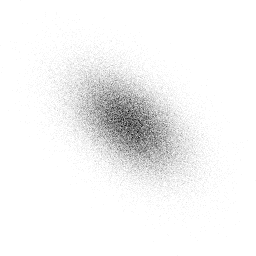

In [34]:
from PIL import Image

Image.fromarray(image)

혹은 bokeh 를 이용하여 표현할 수도 있습니다. 이 때 `image` 를 시계 반대 방향으로 90 도 회전시킨 `image_` 를 이용하였는데, 이는 행렬의 index 기준으로 (0, 0) 이 실제 그림에서는 좌상단의 꼭지점이기 때문입니다. 또한 행렬의 index 는 0 부터 시작하는데, 그림의 축은 0 이 아닌 -5 입니다. 그림에서의 x 의 범위는 x_range 로 표현합니다. 행렬의 (0, 0) 의 값이 그림의 range 에서 (x, y) 에 표현됩니다. 그림의 좌 하단은 (x + dw, y) 에 표현됩니다. 만약 x + dw 가 x_range 보다 짧을 경우, 행렬이 그림 그림 전체를 채우지 않습니다. y 축에 대해서도 동일합니다.

그리고 image, x, dw, y, dh 가 모두 list 로 입력됨에서 알 수 있지만, 입력값이 여러 개의 이미지여도 됩니다.

In [35]:
p = figure(plot_width=300, plot_height=300, x_range=(x_min, x_max), y_range=(y_min, y_max))
p.image(image=[image_], x=[x_min], dw=[x_max - x_min], y=[y_min], dh=[y_max - y_min])
show(p)

## See more

데이터 분석의 관점에서 자주 사용하거나, 알아두면 유용한 내용들만을 발췌하여 튜토리얼로 정리하였습니다. 그 외에 bokeh 로 만들 수 있는 plots 과 apps 에 대해서는 bokeh gallery 를 살펴보길 추천합니다. 그 중에서 몇 가지 apps 예시를 링크에 넣어뒀습니다. Bokeh 가 제공하는 재료들을 잘 가공하면 이러한 설명력 좋은 시각화가 가능합니다.

- http://demo.bokeh.org/movies
- http://docs.bokeh.org/en/latest/docs/gallery/range_tool.html
- http://demo.bokeh.org/stocks
- http://demo.bokeh.org/selection_histogram
- https://docs.bokeh.org/en/latest/docs/gallery/periodic.html

또한 bokeh 에 대하여 자세히 알고 싶다면 official tutorial 을 보시길 추천합니다. 어떤 자료보다도 유용하고 체계적입니다.

- http://docs.bokeh.org/en/latest/docs/user_guide/plotting.html